In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import tkinter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from statistics import stdev as std
import statsmodels.formula.api as sm
pd.set_option("display.max_columns", None)
import statsmodels.api as sm
import matplotlib
import warnings
import statistics

warnings.filterwarnings('ignore')
%matplotlib inline

def merge_fix_cols(df_company,dfroduct,uniqueID):## merge 2 dataframes and remove the duplicate ## 

    df_merged = pd.merge(df_company,
                         dfroduct,
                         how='left',on=uniqueID)    
    for col in df_merged:
        if col.endswith('_x'):
            df_merged.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
        elif col.endswith('_y'):
            to_drop = [col for col in df_merged if col.endswith('_y')]
            df_merged.drop(to_drop,axis=1,inplace=True)
        else:
            pass
    return df_merged




# Auto backward Elimination fucntion##
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(1, numVars):## start from one skip on the intercept ## 
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    print("Reomoved col ",(columns[j]))
                    columns = np.delete(columns, j)
                    
                    
    regressor_OLS.summary()
    return x, columns


def adj_r2 (X,y,yred):
    r_squared=r2_score(y,yred)
    r=(1-r_squared)
    adjusted_r_squared = 1 - (1-r)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return adjusted_r_squared



## read the data and prepare it for analyzeing ## 

In [2]:
dataset = pd.read_excel("data - DCB2.xlsx") ## read the csv file ## 
dataset
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset=dataset.drop(['Unnamed: 1'], axis=1)
dataset = dataset.drop(dataset.index[[0, 1]])

dataset
dataset=dataset.dropna()
dataset

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
2,ea0.2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,260.719
3,mix,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,257.353
4,mix,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317
5,mix,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,251.541
6,mix,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,248.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,mix,99.18,9.135,6.93,3.52,0.285,0.3,41.705,5.145,2.415,1.44,0.0357,0.0437,8.641,5.145,20.125,1.44,0.8,0.0437,269.457
85,mix,109.62,8.265,6.27,2.88,0.315,0.43,46.095,4.655,2.185,2.16,0.0323,0.0483,8.056,4.655,22.335,2.16,0.831,0.0483,241.253
86,mix,114.84,7.83,5.94,2.88,0.33,0.36,48.29,4.41,2.07,2.16,0.0306,0.0506,7.747,4.41,23.42,2.16,0.844,0.0506,232.219
87,mix,120.06,7.395,5.61,2.88,0.345,0.28,50.485,4.165,1.955,2.16,0.0289,0.0529,7.429,4.165,24.538,2.16,0.857,0.0529,223.316


In [3]:
dataset=dataset.rename(columns = { "Unnamed: 2":"Model Properties change" ,
                                  "Unnamed: 3":"UD:E_A",
                                  "Unnamed: 4":"UD:E_T",
                                  "Unnamed: 5":"UD:G_A",
                                  "Unnamed: 6":"UD:G_T",
                                  "Unnamed: 7":"UD:nu_A",
                                  "Unnamed: 8":"UD:nu_T",
                                  "Unnamed: 9":"weave 0/90:E_{11} = E_{33}",
                                  "Unnamed: 10":"weave 0/90:E_{22}",
                                  "Unnamed: 11":"weave 0/90:G_{13}",
                                 "Unnamed: 12":"weave 0/90:G_{21} = G_{23}",
                                 "Unnamed: 13":"weave 0/90:nu_{13}",
                                 "Unnamed: 14":"weave 0/90:nu_{21} = nu_{23}",
                                 "Unnamed: 15":"weave 45:E_{11} = E_{33}",
                                 "Unnamed: 16":"weave 45:E_{22}",
                                 "Unnamed: 17":"weave 45:G_{13}",
                                 "Unnamed: 18":"weave 45:G_{21} = G_{23}",
                                 "Unnamed: 19":"weave 45:nu_{13}",
                                 "Unnamed: 20":"weave 45:nu_{21} = nu_{23}",
                                  "Unnamed: 21":"J-Integral [N/m]"})

# ##"J-Integral [N/m]"##
# dataset=dataset.drop(['Model Properties change'], axis=1)
# df=dataset
# # df
dataset

,Model Properties change,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23},J-Integral [N/m]
2,ea0.2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,260.719
3,mix,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,257.353
4,mix,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317
5,mix,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,251.541
6,mix,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,248.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,mix,99.18,9.135,6.93,3.52,0.285,0.3,41.705,5.145,2.415,1.44,0.0357,0.0437,8.641,5.145,20.125,1.44,0.8,0.0437,269.457
85,mix,109.62,8.265,6.27,2.88,0.315,0.43,46.095,4.655,2.185,2.16,0.0323,0.0483,8.056,4.655,22.335,2.16,0.831,0.0483,241.253
86,mix,114.84,7.83,5.94,2.88,0.33,0.36,48.29,4.41,2.07,2.16,0.0306,0.0506,7.747,4.41,23.42,2.16,0.844,0.0506,232.219
87,mix,120.06,7.395,5.61,2.88,0.345,0.28,50.485,4.165,1.955,2.16,0.0289,0.0529,7.429,4.165,24.538,2.16,0.857,0.0529,223.316


### variable research ## 

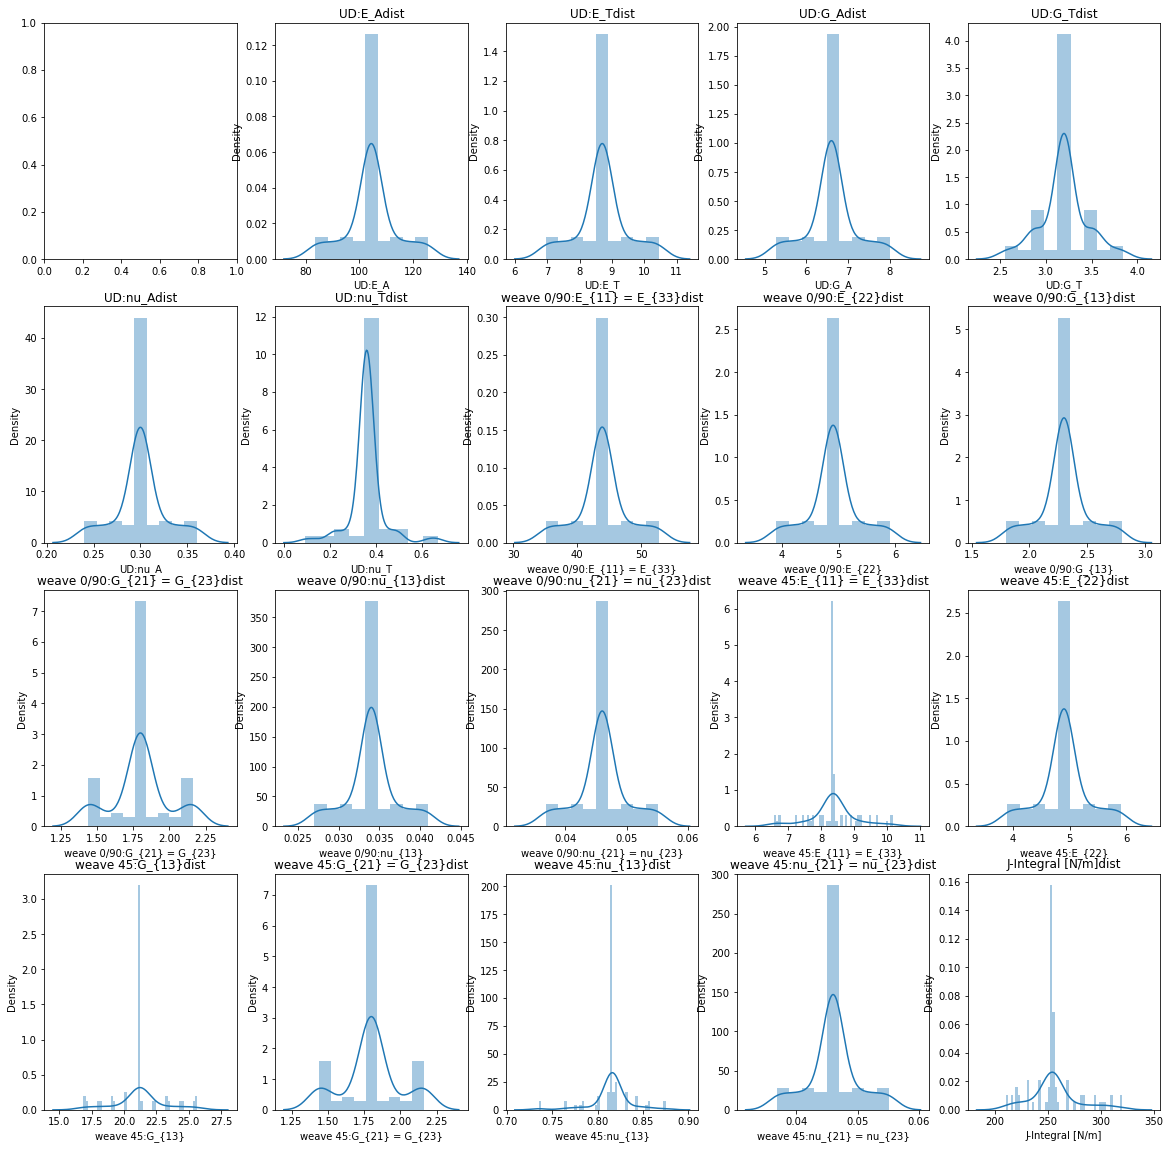

In [4]:

# counter=0
# co=0
# f = plt.figure()
# fig.suptitle('Pokemon Stats by Generation')
# for i in dataset.columns :
#     if i != "Model Properties change":
#         sns.distplot(dataset[i]).set_title(str(i)+"dist")## dist of the postive tests###
#         f.add_subplot(5, 4, co+1)

#         counter=counter +1
#         co=co+1
# #         if counter ==5 :
# #             counter=0 
# #         if counter ==4 :
# #             co=0
# plt.show()


fig, axes = plt.subplots(ncols=5, nrows=4,figsize=(20,20))

for i, ax in zip(dataset.columns, axes.flat):
    if i != "Model Properties change":
         sns.distplot(dataset[i],ax=ax).set_title(str(i)+"dist")## dist of the postive tests###
plt.show()

## prepare the data for machine learning ## 

In [5]:
# dummy = pd.get_dummies(dataset['Model Properties change'], prefix='Model Properties change_')
# df = pd.merge(
#     left=dataset,
#     right=dummy,
#     left_index=True,
#     right_index=True,
# )
df=dataset
df=df.drop(['Model Properties change'], axis=1)
df

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23},J-Integral [N/m]
2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,260.719
3,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,257.353
4,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317
5,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,251.541
6,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,248.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,99.18,9.135,6.93,3.52,0.285,0.3,41.705,5.145,2.415,1.44,0.0357,0.0437,8.641,5.145,20.125,1.44,0.8,0.0437,269.457
85,109.62,8.265,6.27,2.88,0.315,0.43,46.095,4.655,2.185,2.16,0.0323,0.0483,8.056,4.655,22.335,2.16,0.831,0.0483,241.253
86,114.84,7.83,5.94,2.88,0.33,0.36,48.29,4.41,2.07,2.16,0.0306,0.0506,7.747,4.41,23.42,2.16,0.844,0.0506,232.219
87,120.06,7.395,5.61,2.88,0.345,0.28,50.485,4.165,1.955,2.16,0.0289,0.0529,7.429,4.165,24.538,2.16,0.857,0.0529,223.316


In [6]:
# df_corr = df.corr()## show the corr matrix ##
# sns.heatmap(df_corr)

In [7]:
y = df.loc[:,"J-Integral [N/m]":"J-Integral [N/m]"].values ## take the y postive
dfn = df.drop(columns=["J-Integral [N/m]"])## drop the y ## 


In [8]:
# Create correlation matrix
corr_matrix = dfn.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dfn=dfn.drop(dfn[to_drop], axis=1)

dfn

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23}
2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
3,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
4,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
5,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
6,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,99.18,9.135,6.93,3.52,0.285,0.3,41.705,5.145,2.415,1.44,0.0357,0.0437,8.641,5.145,20.125,1.44,0.8,0.0437
85,109.62,8.265,6.27,2.88,0.315,0.43,46.095,4.655,2.185,2.16,0.0323,0.0483,8.056,4.655,22.335,2.16,0.831,0.0483
86,114.84,7.83,5.94,2.88,0.33,0.36,48.29,4.41,2.07,2.16,0.0306,0.0506,7.747,4.41,23.42,2.16,0.844,0.0506
87,120.06,7.395,5.61,2.88,0.345,0.28,50.485,4.165,1.955,2.16,0.0289,0.0529,7.429,4.165,24.538,2.16,0.857,0.0529


In [9]:

prediction_vals = {}# dict for prediction MRSE ##


prediction_vals_r2 = {} #dict for prediction r^2#

prediction_vals_mr2={}#dict for prediction r^2 mean of cross validation#

prediction_vals_std = {}#dict for prediction std of cross validation#


In [10]:
## prediction ## 
x = dfn.values ## last col
x

array([[83.5, 8.7, 6.6, ..., 1.8, 0.816, 0.046],
       [94, 8.7, 6.6, ..., 1.8, 0.816, 0.046],
       [104.4, 8.7, 6.6, ..., 1.8, 0.816, 0.046],
       ...,
       [114.84000000000002, 7.829999999999999, 5.9399999999999995, ...,
        2.16, 0.844, 0.050600000000000006],
       [120.06, 7.395, 5.609999999999999, ..., 2.16, 0.857,
        0.052899999999999996],
       [125.28, 6.96, 5.28, ..., 2.16, 0.875, 0.0552]], dtype=object)

## Multicollinearity check with VIF score ##

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = dfn
X = X.astype('float64')
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,inf,weave 0/90:G_{21} = G_{23}
15,inf,weave 45:G_{21} = G_{23}
13,inf,weave 45:E_{22}
7,inf,weave 0/90:E_{22}
14,2.524736e+06,weave 45:G_{13}
6,2.516111e+06,weave 0/90:E_{11} = E_{33}
17,4.646328e+05,weave 45:nu_{21} = nu_{23}
11,4.639340e+05,weave 0/90:nu_{21} = nu_{23}
3,3.179035e+04,UD:G_T
1,3.144260e+04,UD:E_T


In [12]:
X = dfn.drop(['weave 45:E_{11} = E_{33}', 'weave 45:G_{21} = G_{23}', 'weave 45:E_{22}', 'weave 45:nu_{21} = nu_{23}',"weave 0/90:E_{11} = E_{33}",
"weave 45:G_{13}"
,"weave 45:nu_{21} = nu_{23}","weave 45:nu_{13}","UD:nu_T"], axis=1)
X = X.astype('float64')
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,648.529060,UD:nu_A
0,648.527521,UD:E_A
9,647.737080,weave 0/90:nu_{21} = nu_{23}
3,592.945354,UD:G_T
8,582.326409,weave 0/90:nu_{13}
5,571.422492,weave 0/90:E_{22}
1,555.929597,UD:E_T
6,555.647365,weave 0/90:G_{13}
2,536.719427,UD:G_A
7,354.186091,weave 0/90:G_{21} = G_{23}


In [13]:
# X = df.drop(['weave 0/90:E_{11} = E_{33}', 'weave 45:G_{21} = G_{23}', 'weave 45:E_{22}', 'weave 0/90:E_{22}'], axis=1)


#### split to train test ## 

In [14]:
## prediction train test and validate ## 

X_train, X_test, y_train, y_test =train_test_split(x, y, test_size = 0.2,random_state = 42,shuffle=True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


#### 

## linear regression ## 

_______________________________________
Root mean_squared_error is 2.0511645641093876
r^2 socre is 0.992080262680978
avg of cross validation score is  0.9570602502137983
std cross validation score is  0.04459828034697622


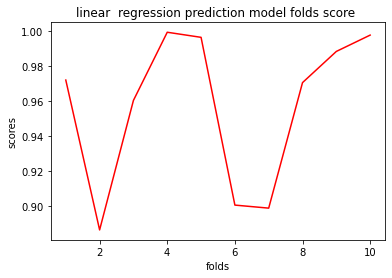

In [15]:
###### print("linear regression prediction")
print("_______________________________________")
## same just for the prediction ##

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)## the prediction of postive ## 



RMSE=sqrt(mean_squared_error(y_pred,y_test))
score=r2_score(y_test,y_pred)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["linear  regression "]=RMSE
prediction_vals_r2["linear  regression "]=score

scores=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


folds=range(1,11)
plt.plot(folds,scores,color="r")
plt.title('linear  regression prediction model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["linear  regression "]=std(scores)
prediction_vals_mr2["linear  regression "]=mean(scores) 

plt.show()

## Polynomial regression ## 

Polynomial  validation
-----!!!!!!!
The Best Dgree is :3


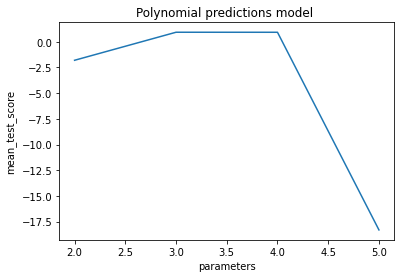

In [16]:

print("Polynomial  validation")
best=0
d2=0
rs=[]
for i in range(2,6):
    poly_reg = PolynomialFeatures(degree = i)## make polyni,ail##
    xn = poly_reg.fit_transform(X_train)## make x polynomial##

    lin_reg_2 = LinearRegression()
    lin2=lin_reg_2.fit(xn,y_train)

    #Evalation#
    yolyred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
    RMSE = sqrt(mean_squared_error(y_test,yolyred))
    r2 =r2_score(y_test,yolyred)


    if r2>d2 :
        best=i
        d2=r2
    
    rs.append(r2)

print("-----!!!!!!!")
print("The Best Dgree is :"+str(best))
plt.plot(range(2,6),rs)
plt.title('Polynomial predictions model ')
plt.xlabel('parameters')
plt.ylabel('mean_test_score')
plt.show()


polynumial  test
_______________________
_________________
Root mean_squared_error is 6.058671083158829
 r^2 socre is  0.930902152462734
_________________


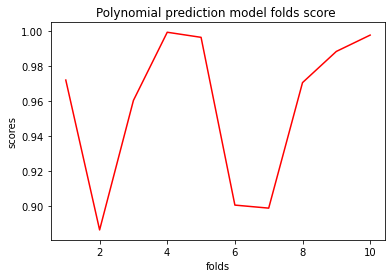

avg of cross validation score is  0.9570602502137983
std cross validation score is  0.04459828034697622


In [17]:
#polynumial regression using 1dgree as the dgree beacuse lowest std in cross validation & have the highest r^2 ## 

#prediction ## 

print("polynumial  test")
print("_______________________")
poly_reg = PolynomialFeatures(best)## make polyni,ail##
xp = poly_reg.fit_transform(X_train)## make x polynomial##

poly_regressor = LinearRegression()
poly_regressor.fit(xp, y_train)

xt = poly_reg.fit_transform(X_test)## make x polynomial##
y_pred = poly_regressor.predict(xt)## the predication of postive ## 
error = y_test-y_pred## the postive eror##
error


print("_________________")
RMSE=sqrt(mean_squared_error(y_test,y_pred))
score=r2_score(y_test,y_pred)
print("Root mean_squared_error is",RMSE)
print(" r^2 socre is ",score)

prediction_vals["polynumial regression"]=RMSE
prediction_vals_r2["polynumial regression"]=score

folds=range(1,11)

scores=cross_val_score(estimator=poly_regressor,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=poly_regressor,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('Polynomial prediction model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["polynumial regression"]=std(scores)
prediction_vals_mr2["polynumial regression"]=mean(scores)

## Ridge regression ## 

Ridge prediction stats
_______________________________
best alpha is  Ridge(alpha=0.0)
Root mean_squared_error is 2.05116456410936
r^2 socre is 0.9920802626809783
_________________


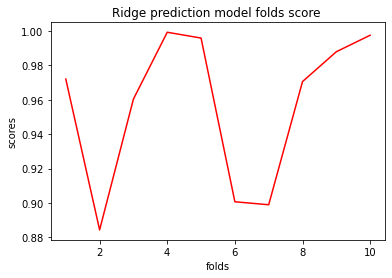

avg of cross validation score is  0.9567197850685742
std cross validation score is  0.04487948876481323


In [18]:
####Ridge##
#prediction####
print("Ridge","prediction stats")
print("_______________________________")
# took from https://machinelearningmastery.com/ridge-regression-with-python/#
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

parameters = {'alpha':arange(0, 10, 0.01)}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='r2',cv=10)

Ridge_reg.fit(X_train,y_train)

cvv=pd.DataFrame(Ridge_reg.cv_results_)
# best estimator
print("best alpha is ",Ridge_reg.best_estimator_)

Ridge = Ridge_reg.best_estimator_
Ridge.fit(X_train, y_train)             
pred3 = Ridge.predict(X_test)  
error = y_test-pred3## the postive eror##

RMSE=sqrt(mean_squared_error(y_test,pred3))
score=r2_score(y_test,pred3)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))
prediction_vals["Ridge regression"]=RMSE
prediction_vals_r2["Ridge regression"]=score
folds=range(1,11)

scores=cross_val_score(estimator=Ridge,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=Ridge,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('Ridge prediction model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["Ridge regression"]=std(scores)
prediction_vals_mr2["Ridge regression"]=mean(scores)

## Lasso regression ## 

Lasso prediction stats
_______________________________
best alpha is  Lasso(alpha=0.06)
Root mean_squared_error is 1.7406660202535855
r^2 socre is 0.9942965101882425
_________________


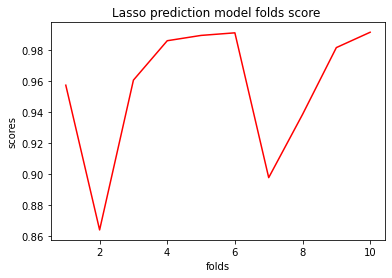

avg of cross validation score is  0.9557973534563877
std cross validation score is  0.0440522930254298


In [19]:
####Lasso##
#prediction####
print("Lasso","prediction stats")
print("_______________________________")

parameters = {'alpha':arange(0, 10, 0.01)}

# define the model/ estimator
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, parameters, scoring='r2',cv=10)

Lasso_reg.fit(X_train,y_train)

# best estimator
print("best alpha is ",Lasso_reg.best_estimator_)

folds=range(1,11)

lasso = Lasso_reg.best_estimator_# Fit the Lasso model
lasso.fit(X_train, y_train)# Create the model score
lassored=lasso.predict(X_test)
RMSE=sqrt(mean_squared_error(y_test,lassored))
score=r2_score(y_test,lassored)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["Lasso regression"]=RMSE
prediction_vals_r2["Lasso regression"]=score

folds=range(1,11)

scores=cross_val_score(estimator=lasso,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=lasso,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('Lasso prediction model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["Lasso regression"]=std(scores)
prediction_vals_mr2["Lasso regression"]=mean(scores)



## Xgboost regression ## 

Fitting 2 folds for each of 1536 candidates, totalling 3072 fits
best parms XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Root mean_squared_error is 1.242550256447489
r^2 socre is 0.9970937183904375
_________________


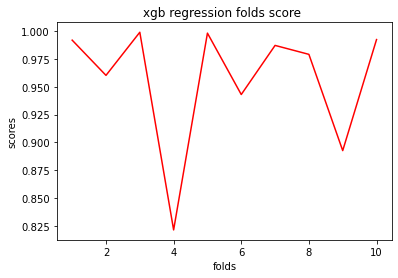

avg of cross validation score is  0.9564459335972838
std cross validation score is  0.05783221508798253


In [20]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8,100,411,1256],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2,0.3,0.4,0.5,0.21,0.23],
                        "colsample_bytree":[ 0.3, 0.4],},
         
grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                   scoring='r2')
# defining parameter range
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#print(grid.grid_scores_)
print("best parms",grid.best_estimator_)

xgb_model=grid.best_estimator_
xgb_model.fit(X_train, y_train)
yred_xgb = xgb_model.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,yred_xgb))
score=r2_score(y_test,yred_xgb)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["xgb regression "]=RMSE
prediction_vals_r2["xgb regression "]=score
folds=range(1,11)

scores=cross_val_score(estimator=xgb_model,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=xgb_model,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try s


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('xgb regression folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["xgb regression "]=std(scores)
prediction_vals_mr2["xgb regression "]=mean(scores)




In [21]:
from sklearn.svm import SVR


## SVM regression ## 

prediction svr 
_______________________________
Best parameters are  SVR(C=10, epsilon=0.2, gamma=1e-07, kernel='linear')
Root mean_squared_error is 1.757774525171252
r^2 socre is 0.9941838432937544
_________________


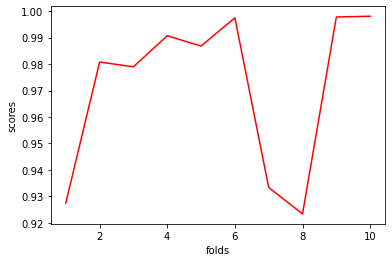

avg of cross validation score is  0.9714806551820013
std cross validation score is  0.03075636082492481


In [22]:
print("prediction svr ")
print("_______________________________")
regressor = SVR(kernel = 'rbf')
param_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 10,n_jobs=-1)
g_search=grid.fit(X_train, y_train);
print("Best parameters are ",grid.best_estimator_)

svr =g_search.best_estimator_
# fit the model on the whole dataset
svr.fit(X_train, y_train)

yred = svr.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,yred))
score=r2_score(y_test,yred)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["svr regression "]=RMSE
prediction_vals_r2["svr regression "]=score


folds=range(1,11)

scores=cross_val_score(estimator=svr,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’


scores2=cross_val_score(estimator=svr,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try s


print("_________________")
plt.plot(folds,scores,color="r")
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["svr regression "]=std(scores)
prediction_vals_mr2["svr regression "]=mean(scores)

## KNN regression ## 

best k {'metric': 'manhattan', 'n_neighbors': 2}
Root mean_squared_error is 7.448714987984317
r^2 socre is 0.8955586489344809
_________________


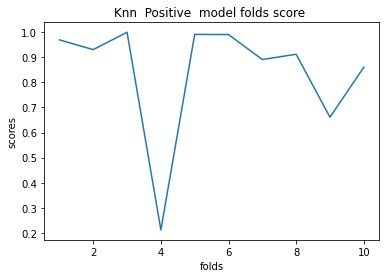

avg of cross validation score is  0.8417313963882348
std cross validation score is  0.24274606575570404


In [23]:
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
n_neighbors = range(1, 70, 1)
metric = ['manhattan']
param_grid = dict(n_neighbors=n_neighbors,metric=metric)

  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2',)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print("best k",grid.best_params_)

knn_model_p=grid.best_estimator_
knn_model_p.fit(X_train, y_train)
y_pred_knn = knn_model_p.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,y_pred_knn))
score=r2_score(y_test,y_pred_knn)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))


prediction_vals["Knn regression "]=RMSE
prediction_vals_r2["Knn regression "]=score

scores=cross_val_score(estimator=knn_model_p,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
print("_________________")
plt.plot(folds,scores)
plt.title('Knn  Positive  model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))

prediction_vals_std["Knn regression "]=std(scores)
prediction_vals_mr2["Knn regression "]=mean(scores)


In [24]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import StackingRegressor
# from matplotlib import pyplot
# from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV


# # get a stacking ensemble of models
# def get_stacking():
# # define the base models
#     level0 = list()
#     level0.append(('knn', KNeighborsRegressor()))
#     level0.append(('cart', DecisionTreeRegressor()))
#     level0.append(('svm', SVR()))
#     level0.append(('ridge', Ridge()))   
#     level0.append(('Lasso', Lasso())) 
#     # define meta learner model
#     level1 = LinearRegression()
#     # define the stacking ensemble
#     model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
#     return model
 
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     models['knn'] = KNeighborsRegressor()
#     models['cart'] = DecisionTreeRegressor()
#     models['svm'] = SVR()
#     models['Ridge'] = Ridge()
#     models['Lasso'] = Lasso()
#     models['stacking'] = get_stacking()
#     return models
 
# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
#     return scores
 

# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model,x, y)
#     results.append(scores,color="r")
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name,+ mean(scores,color="r"), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()


## Outpots prepration ## 

In [25]:
prediction_vals_r2

{'linear  regression ': 0.992080262680978,
 'polynumial regression': 0.930902152462734,
 'Ridge regression': 0.9920802626809783,
 'Lasso regression': 0.9942965101882425,
 'xgb regression ': 0.9970937183904375,
 'svr regression ': 0.9941838432937544,
 'Knn regression ': 0.8955586489344809}

## Tabel and charts of the R^2 ,Rmse of the models and CV std and mean of R^2 of 10 folds##

In [26]:
df1 = pd.DataFrame(list(prediction_vals_r2.items()), columns=['name', 'r2_score'])
df2 = pd.DataFrame(list(prediction_vals.items()), columns=['name', 'RMSE_score'])
df5=pd.DataFrame(list(prediction_vals_std.items()), columns=['name', 'std_score'])
df7=pd.DataFrame(list(prediction_vals_mr2.items()), columns=['name', 'mean_kfold_r^2'])

df_chart=merge_fix_cols(df1,df2,'name')
df_chart=merge_fix_cols(df_chart,df5,'name')
df_chart=merge_fix_cols(df_chart,df7,'name')
df_chart

,name,r2_score,RMSE_score,std_score,mean_kfold_r^2
0,linear regression,0.992080,2.051165,0.044598,0.957060
1,polynumial regression,0.930902,6.058671,0.044598,0.957060
2,Ridge regression,0.992080,2.051165,0.044879,0.956720
3,Lasso regression,0.994297,1.740666,0.044052,0.955797
4,xgb regression,0.997094,1.242550,0.057832,0.956446
5,svr regression,0.994184,1.757775,0.030756,0.971481
6,Knn regression,0.895559,7.448715,0.242746,0.841731


In [27]:
## random forest and knn made big fail ## 

In [28]:
## the best mode to use is Lasso ## 

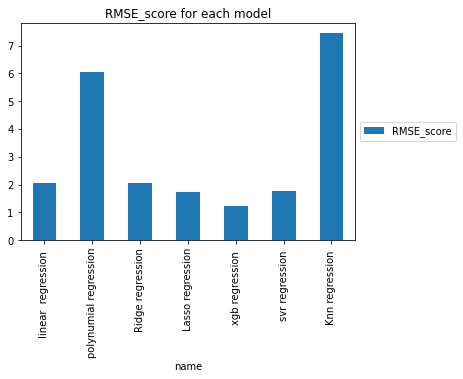

In [29]:
df_chart.plot(x ='name', y=["RMSE_score"], kind = 'bar')

plt.title('RMSE_score for each model')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),prop={"size":10})## THE LEGEND ##
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

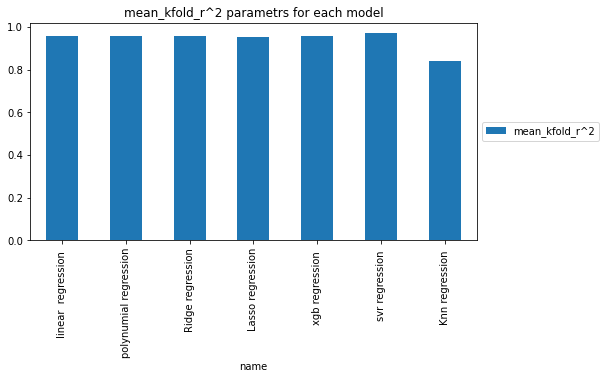

In [30]:
df_chart.plot(x ='name', y=["mean_kfold_r^2"], kind = 'bar')

plt.title('mean_kfold_r^2 parametrs for each model')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),prop={"size":10})## THE LEGEND ##
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

In [31]:
##pycart for checking##

In [32]:
#dataset.columns

In [33]:
#import pycaret
#from pycaret.regression import *

In [34]:
#exp_reg101 = setup(data = dataset,numeric_features=['UD:E_A', 'UD:E_T', 'UD:G_A', 'UD:G_T',
     #  'UD:nu_A', 'UD:nu_T', 'weave 0/90:E_{11} = E_{33}', 'weave 0/90:E_{22}',
     #  'weave 0/90:G_{13}', 'weave 0/90:G_{21} = G_{23}', 'weave 0/90:nu_{13}',
     #  'weave 0/90:nu_{21} = nu_{23}', 'weave 45:E_{11} = E_{33}',
     #  'weave 45:E_{22}', 'weave 45:G_{13}', 'weave 45:G_{21} = G_{23}',
     #  'weave 45:nu_{13}', 'weave 45:nu_{21} = nu_{23}'], target = "Target") 


In [35]:
#best = compare_models()


In [36]:
#CBR = create_model('ridge')


In [37]:
#tuned_CBR = tune_model(CBR,n_iter = 50)


In [38]:
#plot_model(tuned_CBR)


# Feature importace #

In [39]:
#Feature importace ##
fet_im = {} #dict for prediction r^2#

importance = xgb_model.feature_importances_
# summarize feature importance
counter=0
for i,v in enumerate(importance):
    if v > 0.0 :
        print((dfn.columns[counter]),"/importance: "+str(v))
        fet_im[dfn.columns[counter]]=v
    counter=counter+1
        



UD:E_A /importance: 0.09265778
UD:E_T /importance: 0.0006398481
UD:G_A /importance: 0.0011558528
UD:G_T /importance: 0.00063931436
UD:nu_A /importance: 0.03376412
UD:nu_T /importance: 0.0003586443
weave 0/90:E_{11} = E_{33} /importance: 0.41608965
weave 0/90:E_{22} /importance: 0.0017323577
weave 0/90:G_{13} /importance: 0.005359061
weave 0/90:G_{21} = G_{23} /importance: 0.067390025
weave 0/90:nu_{13} /importance: 0.0029874416
weave 0/90:nu_{21} = nu_{23} /importance: 0.03018654
weave 45:E_{11} = E_{33} /importance: 0.010165047
weave 45:E_{22} /importance: 0.0037369542
weave 45:G_{13} /importance: 0.14450845
weave 45:G_{21} = G_{23} /importance: 0.05580006
weave 45:nu_{13} /importance: 0.005662527
weave 45:nu_{21} = nu_{23} /importance: 0.12716635


In [40]:
fet_im
df_fet_im= pd.DataFrame(list(fet_im.items()), columns=['feature_name', 'importance'])

# Feature importace Bar plot  #

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'UD:E_A'),
  Text(1, 0, 'UD:E_T'),
  Text(2, 0, 'UD:G_A'),
  Text(3, 0, 'UD:G_T'),
  Text(4, 0, 'UD:nu_A'),
  Text(5, 0, 'UD:nu_T'),
  Text(6, 0, 'weave 0/90:E_{11} = E_{33}'),
  Text(7, 0, 'weave 0/90:E_{22}'),
  Text(8, 0, 'weave 0/90:G_{13}'),
  Text(9, 0, 'weave 0/90:G_{21} = G_{23}'),
  Text(10, 0, 'weave 0/90:nu_{13}'),
  Text(11, 0, 'weave 0/90:nu_{21} = nu_{23}'),
  Text(12, 0, 'weave 45:E_{11} = E_{33}'),
  Text(13, 0, 'weave 45:E_{22}'),
  Text(14, 0, 'weave 45:G_{13}'),
  Text(15, 0, 'weave 45:G_{21} = G_{23}'),
  Text(16, 0, 'weave 45:nu_{13}'),
  Text(17, 0, 'weave 45:nu_{21} = nu_{23}')])

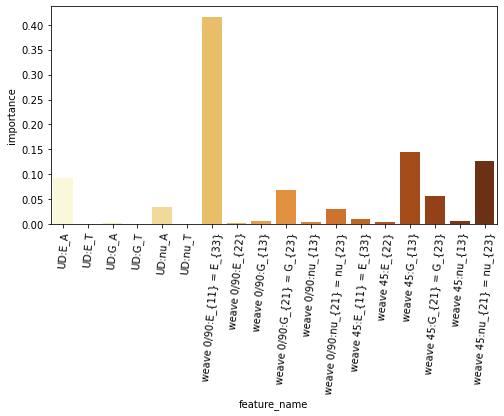

In [41]:
# plot feature importance
sns.barplot(x = 'feature_name',
            y = 'importance',
            data = df_fet_im,
            palette = "YlOrBr")
plt.xticks(rotation=85)


In [42]:
df_imp=dfn[fet_im.keys()] ## just important features ## 
df_imp

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23}
2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
3,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
4,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
5,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
6,125.3,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,99.18,9.135,6.93,3.52,0.285,0.3,41.705,5.145,2.415,1.44,0.0357,0.0437,8.641,5.145,20.125,1.44,0.8,0.0437
85,109.62,8.265,6.27,2.88,0.315,0.43,46.095,4.655,2.185,2.16,0.0323,0.0483,8.056,4.655,22.335,2.16,0.831,0.0483
86,114.84,7.83,5.94,2.88,0.33,0.36,48.29,4.41,2.07,2.16,0.0306,0.0506,7.747,4.41,23.42,2.16,0.844,0.0506
87,120.06,7.395,5.61,2.88,0.345,0.28,50.485,4.165,1.955,2.16,0.0289,0.0529,7.429,4.165,24.538,2.16,0.857,0.0529


## Save the model ## 

In [43]:
import pickle
# save
pickle.dump(xgb_model, open("DCM_XGBOOST_trained_Model_With 45", "wb"))
pickle.dump(svr, open("DCM_svr_trained_Model_With 45", "wb"))

# # load
# xgb_model_loaded = pickle.load(open(file_name, "rb"))

# # test
# ind = 1
# test = X_val[ind]
# xgb_model_loaded.predict(test)[0] == xgb_model.predict(test)[0]

# Out[1]: True

# another xgb & svm models without weave 45 features ## 

### remove 45weave & unu-t## 
## and prepare the data ## 

In [44]:
df2=dataset
df2
df2=df2.drop(["Model Properties change","UD:nu_T","weave 45:E_{11} = E_{33}","weave 45:E_{22}","weave 45:G_{13}","weave 45:G_{21} = G_{23}","weave 45:nu_{13}","weave 45:nu_{21} = nu_{23}"],axis=1)
df2

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},J-Integral [N/m]
2,83.5,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,260.719
3,94,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,257.353
4,104.4,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,254.317
5,114.8,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,251.541
6,125.3,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,248.966
...,...,...,...,...,...,...,...,...,...,...,...,...
84,99.18,9.135,6.93,3.52,0.285,41.705,5.145,2.415,1.44,0.0357,0.0437,269.457
85,109.62,8.265,6.27,2.88,0.315,46.095,4.655,2.185,2.16,0.0323,0.0483,241.253
86,114.84,7.83,5.94,2.88,0.33,48.29,4.41,2.07,2.16,0.0306,0.0506,232.219
87,120.06,7.395,5.61,2.88,0.345,50.485,4.165,1.955,2.16,0.0289,0.0529,223.316


In [45]:
y_2 = df2.loc[:,"J-Integral [N/m]":"J-Integral [N/m]"].values ## take the y postive
dfn_2 = df2.drop(columns=["J-Integral [N/m]"])## drop the y ## 
x_2 = dfn_2.values ## last col

X_train_n, X_test_n, y_train_n, y_test_n =train_test_split(x_2, y_2, test_size = 0.2,random_state = 42,shuffle=True)

sc = StandardScaler()
X_train_n = sc.fit_transform(X_train_n)
X_test_n = sc.transform (X_test_n)


## Xgboost##

Fitting 2 folds for each of 360 candidates, totalling 720 fits
best parms XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Root mean_squared_error is 4.4618011473303465
r^2 socre is 0.9625259882369709
_________________


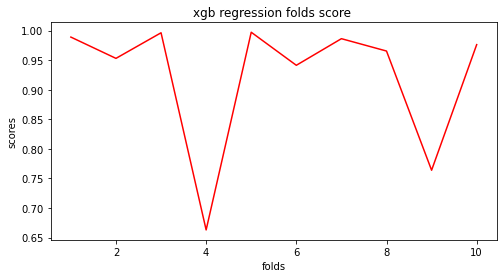

avg of cross validation score is  0.9230676556815188
std cross validation score is  0.11447269600130694


In [46]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
         
grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                   scoring='r2')
# defining parameter range
  
# fitting the model for grid search
grid_search=grid.fit(X_train_n, y_train_n)
#print(grid.grid_scores_)
print("best parms",grid.best_estimator_)

xgb_model_2=grid.best_estimator_
xgb_model_2.fit(X_train_n, y_train_n)
yred_xgb = xgb_model_2.predict(X_test_n)

RMSE=sqrt(mean_squared_error(y_test_n,yred_xgb))
score=r2_score(y_test_n,yred_xgb)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))


folds=range(1,11)

scores=cross_val_score(estimator=xgb_model_2,X=X_train_n,y=y_train_n,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=xgb_model_2,X=X_train_n,y=y_train_n,cv=10,scoring='neg_mean_squared_error') #you can also try s


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('xgb regression folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))


## SVM##

prediction svr_2 
_______________________________
Best parameters are  SVR(C=10, epsilon=0.5, gamma=1e-07, kernel='linear')
Root mean_squared_error is 5.068380571279989
r^2 socre is 0.9516442412671355
_________________


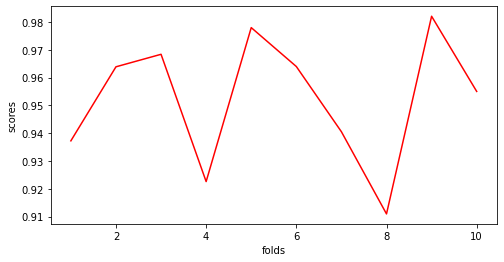

avg of cross validation score is  0.9522764979070737
std cross validation score is  0.02368145902669057


In [47]:
print("prediction svr_2 ")
print("_______________________________")
regressor = SVR(kernel = 'rbf')
param_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 10,n_jobs=-1)
g_search=grid.fit(X_train_n, y_train_n);
print("Best parameters are ",grid.best_estimator_)

svr_2 =g_search.best_estimator_
# fit the model on the whole dataset
svr_2.fit(X_train_n, y_train_n)

yred = svr_2.predict(X_test_n)

RMSE=sqrt(mean_squared_error(y_test_n,yred))
score=r2_score(y_test_n,yred)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["svr_2 regression "]=RMSE
prediction_vals_r2["svr_2 regression "]=score


folds=range(1,11)

scores=cross_val_score(estimator=svr_2,X=X_train_n,y=y_train_n,cv=10,scoring='r2') #you can also try scoring=‘r2’


scores2=cross_val_score(estimator=svr_2,X=X_train_n,y=y_train_n,cv=10,scoring='neg_mean_squared_error') #you can also try s


print("_________________")
plt.plot(folds,scores,color="r")
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))


## Save the model ## 

In [48]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model_2, open("DCM_XGBOOST_trained_Model_Without 45", "wb"))
pickle.dump(svr_2, open("DCM_svr_trained_Model_Without 45", "wb"))


## Feature importace ## 

Feature name: UD:E_A /Feature number: 0 /Feature importance: 0.09265778
Feature name: UD:E_T /Feature number: 1 /Feature importance: 0.0006398481
Feature name: UD:G_A /Feature number: 2 /Feature importance: 0.0011558528
Feature name: UD:G_T /Feature number: 3 /Feature importance: 0.00063931436
Feature name: UD:nu_A /Feature number: 4 /Feature importance: 0.03376412
Feature name: weave 0/90:E_{11} = E_{33} /Feature number: 5 /Feature importance: 0.0003586443
Feature name: weave 0/90:E_{22} /Feature number: 6 /Feature importance: 0.41608965
Feature name: weave 0/90:G_{13} /Feature number: 7 /Feature importance: 0.0017323577
Feature name: weave 0/90:G_{21} = G_{23} /Feature number: 8 /Feature importance: 0.005359061
Feature name: weave 0/90:nu_{13} /Feature number: 9 /Feature importance: 0.067390025
Feature name: weave 0/90:nu_{21} = nu_{23} /Feature number: 10 /Feature importance: 0.0029874416
Feature name: weave 0/90:nu_{21} = nu_{23} /Feature number: 10 /Feature importance: 0.03018654


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'UD:E_A'),
  Text(1, 0, 'UD:E_T'),
  Text(2, 0, 'UD:G_A'),
  Text(3, 0, 'UD:G_T'),
  Text(4, 0, 'UD:nu_A'),
  Text(5, 0, 'weave 0/90:E_{11} = E_{33}'),
  Text(6, 0, 'weave 0/90:E_{22}'),
  Text(7, 0, 'weave 0/90:G_{13}'),
  Text(8, 0, 'weave 0/90:G_{21} = G_{23}'),
  Text(9, 0, 'weave 0/90:nu_{13}'),
  Text(10, 0, 'weave 0/90:nu_{21} = nu_{23}')])

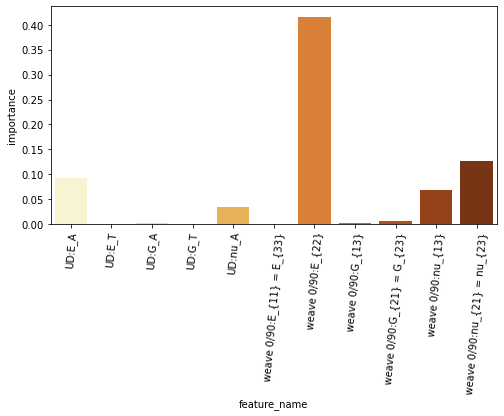

In [49]:
#Feature importace ##
fet_im_2 = {} #dict for prediction r^2#

importance = xgb_model.feature_importances_
# summarize feature importance
counter=0
for i,v in enumerate(importance):
    if v > 0.0 :
        print(("Feature name: "+dfn_2.columns[counter]),"/Feature number: "+str(counter),"/Feature importance: "+str(v))
        fet_im_2[dfn_2.columns[counter]]=v
    if counter != 10 :
        counter=counter+1
fet_im_2
df_fet_im_2= pd.DataFrame(list(fet_im_2.items()), columns=['feature_name', 'importance'])
# plot feature importance
sns.barplot(x = 'feature_name',
            y = 'importance',
            data = df_fet_im_2,
            palette = "YlOrBr")
plt.xticks(rotation=85)

## Testing on real Data of 4 rows  ##

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import tkinter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from statistics import stdev as std
import statsmodels.formula.api as sm
pd.set_option("display.max_columns", None)
import statsmodels.api as sm
import matplotlib
import warnings
import statistics
dataset2 = pd.read_excel("real_data_for_test.xlsx") ## read the csv file ## 
dataset2
dataset2=dataset2.drop(['Unnamed: 0'], axis=1)
dataset2=dataset2.drop(['Unnamed: 1'], axis=1)
dataset2 = dataset2.drop(dataset2.index[[0, 1]])

dataset2
dataset2=dataset2.dropna()
dataset2
dataset2=dataset2.rename(columns = { "Unnamed: 2":"Model Properties change" ,
                                  "Unnamed: 3":"UD:E_A",
                                  "Unnamed: 4":"UD:E_T",
                                  "Unnamed: 5":"UD:G_A",
                                  "Unnamed: 6":"UD:G_T",
                                  "Unnamed: 7":"UD:nu_A",
                                  "Unnamed: 8":"UD:nu_T",
                                  "Unnamed: 9":"weave 0/90:E_{11} = E_{33}",
                                  "Unnamed: 10":"weave 0/90:E_{22}",
                                  "Unnamed: 11":"weave 0/90:G_{13}",
                                 "Unnamed: 12":"weave 0/90:G_{21} = G_{23}",
                                 "Unnamed: 13":"weave 0/90:nu_{13}",
                                 "Unnamed: 14":"weave 0/90:nu_{21} = nu_{23}",
                                 "Unnamed: 15":"weave 45:E_{11} = E_{33}",
                                 "Unnamed: 16":"weave 45:E_{22}",
                                 "Unnamed: 17":"weave 45:G_{13}",
                                 "Unnamed: 18":"weave 45:G_{21} = G_{23}",
                                 "Unnamed: 19":"weave 45:nu_{13}",
                                 "Unnamed: 20":"weave 45:nu_{21} = nu_{23}",
                                  "Unnamed: 21":"J-Integral [N/m]"})


In [51]:
df_test=dataset2
df_test=df_test.drop(['Model Properties change'], axis=1)
df_test
y_test = df_test.loc[:,"J-Integral [N/m]":"J-Integral [N/m]"].values ## take the y postive
dftest = df_test.drop(columns=["J-Integral [N/m]"])## drop the y ## 

x_test = dftest.values ## last col
dftest

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23}
2,110.6,7,2.7,2.5,0.38,0.4,52.8,6.2,3.2,2.2,0.036,0.049,11.5,6.2,25.5,2.2,0.84,0.049
3,77.1,4.8,1.9,1.6,0.26,0.5,34.2,5.4,2.1,1.7,0.052,0.073,7.5,5.4,16.3,1.7,0.79,0.073
4,114.6,7.2,2.8,2.5,0.39,0.44,57.8,6.2,3.1,2.4,0.1,0.045,11.3,6.2,26.2,2.4,0.8,0.04
5,114.6,7.2,6.2,3,0.32,0.2,52.6,5.8,2.7,2.1,0.04,0.045,9.8,5.8,25.288,2.1,0.821,0.045


In [52]:
import pickle
dicti={}

# # load
xgb_model_loaded = pickle.load(open("DCM_XGBOOST_trained_Model_With 45", "rb"))

# # test
dicto = {}
for i in range(0,4):
    dicto["XGBOOST_trained_Model_With 45"+" Row "+str(i+1)+" eror is "]=float(xgb_model_loaded.predict(x_test)[i]-y_test[i]) 

RMSE=sqrt(mean_squared_error(xgb_model_loaded.predict(x_test),y_test))
dicti["XGBOOST_trained_Model_With 45"+" RMSE "+str(i+1)+" eror is "]=float(RMSE) 
    
dicto
SVR_model_loadedwith45 = pickle.load(open("DCM_svr_trained_Model_With 45", "rb"))

for i in range(0,4):
    dicto["SVM_trained_Model_With 45"+" Row "+str(i)+" eror is "]=float(SVR_model_loadedwith45.predict(x_test)[i]-y_test[i]) 
    
dicto
RMSE=sqrt(mean_squared_error(SVR_model_loadedwith45.predict(x_test),y_test))
dicti["SVM_trained_Model_With 45"+" RMSE "+" eror is "]=float(RMSE) 
dicto

{'XGBOOST_trained_Model_With 45 Row 1 eror is ': 22.909457031249985,
 'XGBOOST_trained_Model_With 45 Row 2 eror is ': -108.25054296874998,
 'XGBOOST_trained_Model_With 45 Row 3 eror is ': 11.993457031250017,
 'XGBOOST_trained_Model_With 45 Row 4 eror is ': -2.3065429687499943,
 'SVM_trained_Model_With 45 Row 0 eror is ': -595.4281204530826,
 'SVM_trained_Model_With 45 Row 1 eror is ': -511.0049249015152,
 'SVM_trained_Model_With 45 Row 2 eror is ': -632.4983106568715,
 'SVM_trained_Model_With 45 Row 3 eror is ': -612.8709005485896}

In [53]:
df_test
df_test_no45=df_test.drop(['weave 45:E_{11} = E_{33}',"UD:nu_T","weave 45:E_{22}","weave 45:G_{13}","weave 45:G_{21} = G_{23}","weave 45:nu_{13}","weave 45:nu_{21} = nu_{23}"], axis=1)
df_test_no45

y_test_no45 = df_test.loc[:,"J-Integral [N/m]":"J-Integral [N/m]"].values ## take the y postive
df_test_no45 = df_test_no45.drop(columns=["J-Integral [N/m]"])## drop the y ## 

x_test_no45 = df_test_no45.values ## last col

In [54]:
xgb_model_loadedno45 = pickle.load(open("DCM_XGBOOST_trained_Model_Without 45", "rb"))
for i in range(0,4):
     dicto["XGBOOST_trained_Model_Without 45"+" Row "+str(i+1)+" eror is "]=float(xgb_model_loadedno45.predict(x_test_no45)[i]-y_test_no45[i]) 
RMSE=sqrt(mean_squared_error(xgb_model_loadedno45.predict(x_test_no45),y_test_no45))
dicti["XGBOOST_trained_Model_Without 45"+" RMSE "+" eror is "]=float(RMSE) 

SVR_model_loadedno45 = pickle.load(open("DCM_svr_trained_Model_Without 45", "rb"))

for i in range(0,4):
    dicto["SVM_trained_Model_Without 45"+" Row "+str(i+1)+" eror is "]=float(SVR_model_loadedno45.predict(x_test_no45)[i]-y_test_no45[i]) 
RMSE=sqrt(mean_squared_error(SVR_model_loadedno45.predict(x_test_no45),y_test_no45))
dicti["SVM_trained_Model_Without 45"+" RMSE "+" eror is "]=float(RMSE) 
    

dicto

{'XGBOOST_trained_Model_With 45 Row 1 eror is ': 22.909457031249985,
 'XGBOOST_trained_Model_With 45 Row 2 eror is ': -108.25054296874998,
 'XGBOOST_trained_Model_With 45 Row 3 eror is ': 11.993457031250017,
 'XGBOOST_trained_Model_With 45 Row 4 eror is ': -2.3065429687499943,
 'SVM_trained_Model_With 45 Row 0 eror is ': -595.4281204530826,
 'SVM_trained_Model_With 45 Row 1 eror is ': -511.0049249015152,
 'SVM_trained_Model_With 45 Row 2 eror is ': -632.4983106568715,
 'SVM_trained_Model_With 45 Row 3 eror is ': -612.8709005485896,
 'XGBOOST_trained_Model_Without 45 Row 1 eror is ': 13.721041503906235,
 'XGBOOST_trained_Model_Without 45 Row 2 eror is ': -117.43895849609373,
 'XGBOOST_trained_Model_Without 45 Row 3 eror is ': 2.805041503906267,
 'XGBOOST_trained_Model_Without 45 Row 4 eror is ': -11.494958496093744,
 'SVM_trained_Model_Without 45 Row 1 eror is ': -1076.116519380263,
 'SVM_trained_Model_Without 45 Row 2 eror is ': -820.5605272943919,
 'SVM_trained_Model_Without 45 Row 3 

In [55]:
dfp = pd.DataFrame(list(dicto.items()), columns=['name', 'eror'])
dfp
dfrmse=pd.DataFrame(list(dicti.items()), columns=['model', 'Rmse'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'XGBOOST_trained_Model_With 45 RMSE 4 eror is '),
  Text(1, 0, 'SVM_trained_Model_With 45 RMSE  eror is '),
  Text(2, 0, 'XGBOOST_trained_Model_Without 45 RMSE  eror is '),
  Text(3, 0, 'SVM_trained_Model_Without 45 RMSE  eror is ')])

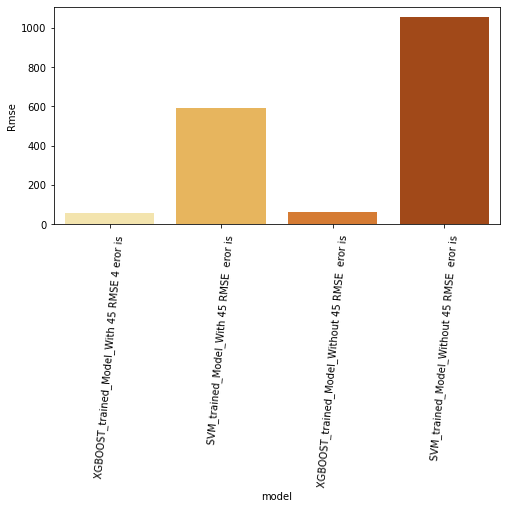

In [56]:
sns.barplot(x = 'model',
            y = 'Rmse',
            data = dfrmse,
            palette = "YlOrBr")
plt.xticks(rotation=85)

In [57]:
dfp


,name,eror
0,XGBOOST_trained_Model_With 45 Row 1 eror is,22.909457
1,XGBOOST_trained_Model_With 45 Row 2 eror is,-108.250543
2,XGBOOST_trained_Model_With 45 Row 3 eror is,11.993457
3,XGBOOST_trained_Model_With 45 Row 4 eror is,-2.306543
4,SVM_trained_Model_With 45 Row 0 eror is,-595.428120
5,SVM_trained_Model_With 45 Row 1 eror is,-511.004925
6,SVM_trained_Model_With 45 Row 2 eror is,-632.498311
7,SVM_trained_Model_With 45 Row 3 eror is,-612.870901
8,XGBOOST_trained_Model_Without 45 Row 1 eror is,13.721042
9,XGBOOST_trained_Model_Without 45 Row 2 eror is,-117.438958


In [58]:
dfrmse

,model,Rmse
0,XGBOOST_trained_Model_With 45 RMSE 4 eror is,55.660099
1,SVM_trained_Model_With 45 RMSE eror is,589.772315
2,XGBOOST_trained_Model_Without 45 RMSE eror is,59.414178
3,SVM_trained_Model_Without 45 RMSE eror is,1054.626563
